Голещихин Олег  
**Прикладная статистика  
Домашнее задание 3**

**Упражнение 2.** Для данных из файла employees.xls постройте гистограмму для переменной Salary. Похоже ли распределение зарплат на нормальный закон? Проверьте нормальность с помощью изученных критериев.

In [6]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

%matplotlib inline

In [4]:
np.random.seed(111)

In [11]:
data = pd.read_excel('employees.xls')

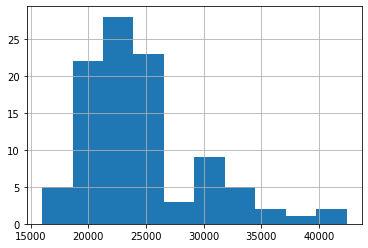

In [10]:
# Построем гистограмму для переменной Salary

plt.hist(data['SALARY'])
plt.grid()
plt.show()

Из гистрограммы явно видно, что данные отличаются от нормального распределения. Как минимум выделяется тяжелый правый хвост.

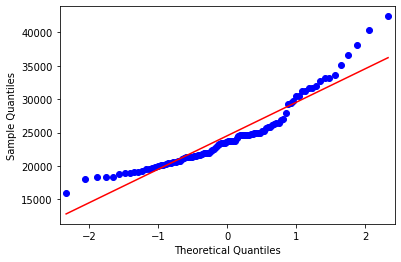

In [26]:
# Построим квантильный график

qqplot(data['SALARY'], dist=stats.norm, line='r')
plt.show()

Как видно из квантильного графика, точки явно не ложатся на одну прямую, что дополнительно подтверждает картину, показанную на гистрограмме: скорее всего, наша выборка пришла не из нормального распределения.

In [28]:
# Проверим нормальность выборки при помощи критерия Шапиро-Уилка

stats.shapiro(data['SALARY'])

(0.9015016555786133, 1.6645467439957429e-06)

Значение p-value для рассчитанной статистики критерия оказалось порядка $10^{-6}$, критерий Шапиро-Уилка отвергает гипотезу о том, что наша выборка пришла из нормального распределения.

In [29]:
# Проверим нормальность выборки при помощи критерия Харке-Бера

stats.jarque_bera(data['SALARY'])

(34.06327990738705, 4.011000820369759e-08)

Значение p-value для рассчитанной статистики критерия оказалось порядка $10^{-8}$, критерий Харке-Бера отвергает гипотезу о том, что наша выборка пришла из нормального распределения.

**Вывод:** оба рассмотренных критерия отвергают гипотезу о том, что выборка значений заработной платы пришла из нормального распределения, квантильный график также говорит в пользу того, что перед нами выборка не из нормального распределения.

**Упражнение 3.** Методом перебора найдите наиболее подходящий тип распределения для выборки, содержащейся в файле sample.csv. Сначала постройте гистограмму, чтобы получить представление о форме плотности распределения. Затем изучите квантильные графики для разных распределений. Если будет такая возможность попробуйте применить какие-то критерии согласия.

In [78]:
data_t2 = pd.read_csv('sample.csv')
sample = data_t2.values.reshape(-1)
sample.shape

(100,)

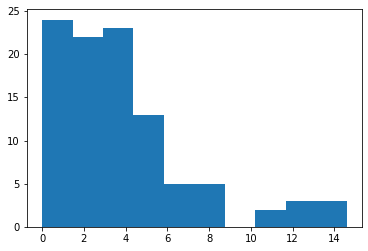

In [79]:
plt.hist(sample)
plt.show()

Однозначно предположить распределение, из которого пришла данная выборка по гистраграмме сложно. Тем не менее, видно, что картина не соответствует нормальному и равномерному распределению. Но есть определенное сходство с экспоненциальным распределением: мы видим большие значения в левой части гистрограммы, которые затем быстро убывают.

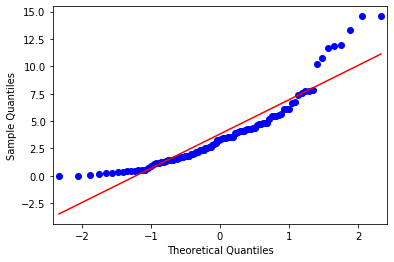

In [80]:
# построим квантильный график для нормального распределения

qqplot(sample, dist=stats.norm, line='r')
plt.show()

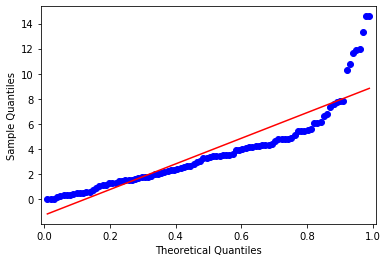

In [81]:
# построим квантильный график для равномерного распределения

qqplot(sample, dist=stats.uniform, line='r')
plt.show()

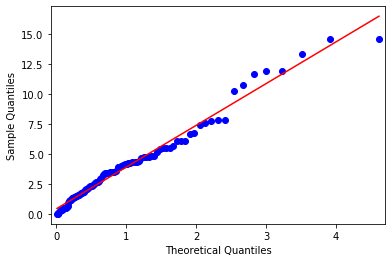

In [82]:
# построим квантильный график для экспоненциального распределения

qqplot(sample, dist=stats.expon, line='r')
plt.show()

Как видно из представленных выше графиков, визуально наша выборка больше всего соответствует (хотя и не идеально) экспоненциальному распределению.

In [100]:
# Выполним проверку на экспоненциальность

s = np.sum(sample)
vec = []
for i in range(1, len(sample)):
    vec.append(np.sum(sample[:i])/s)
vec = np.array(vec)

stats.kstest(rvs=vec, cdf=stats.uniform.cdf)

KstestResult(statistic=0.07002123333746968, pvalue=0.7238202721939277)

**Вывод:** Мы получили p-value 0.72. Значит, критерий Колмогорова не отвергает гипотезу о том, что наша новая выборка, полученная на основе исходной, пришла из равномерного распределения на отрезке [0, 1]. А это, в свою очередь, означает, что гипотеза о том, что наша исходная выборка пришла из экспоненциального распределения также не отвергается.

**Упражнение 4.** В файле anorexia.txt записан вес пациентов до начала терапии анарексии и после ее окончания. Была терапия эффективна?

In [102]:
anorexia = pd.read_csv('anorexia.txt', delimiter='\t')
anorexia

,Before,After
0,80.5,82.2
1,84.9,85.6
2,81.5,81.4
3,82.6,81.9
4,79.9,76.4
5,88.7,103.6
6,94.9,98.4
7,76.3,93.4
8,81.0,73.4
9,80.5,82.1
